In [4]:
%matplotlib widget

In [5]:
import numpy as np
import xtrack as xt
import matplotlib.pyplot as plt

### Load lattice

In [6]:
env = xt.Environment()
env.call('../fccee_z_lattice.py')

### Load quad strength matchs so far

In [7]:
env.vars.load_json('strengths_quads_00_arc_cell.json')
env.vars.load_json('strengths_quads_01_ffccsyl.json')
env.vars.load_json('strengths_quads_02_ffccsxl.json')
env.vars.load_json('strengths_quads_03_ffccsyr.json')
env.vars.load_json('strengths_quads_04_ffccsxr.json')
env.vars.load_json('strengths_quads_05_ffds_lr.json')

### Build an arc

In [10]:
arc_octant = 25 * env['cell_u']
tw_arc = arc_octant.twiss4d()

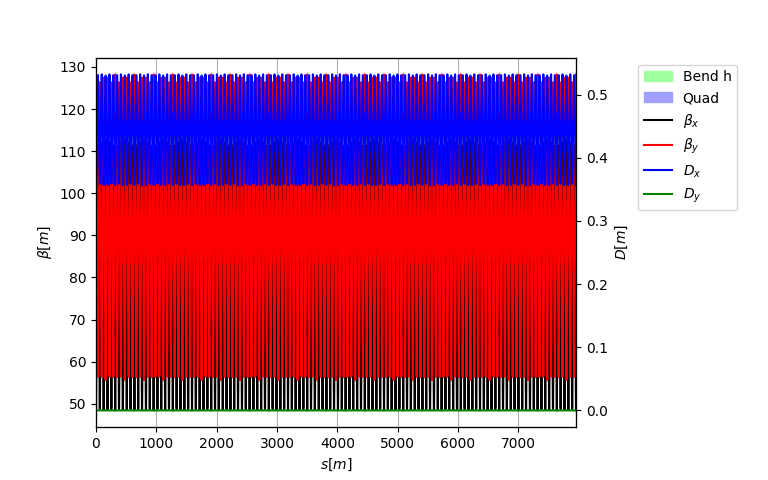

In [12]:
tw_arc.plot()

### Build largr machine sections

In [16]:
experimental_insertion_l =  (env['cell_l3'] + env['cell_uffl'] + env['mark_e_ffl'] + env['ffl'])
experimental_insertion_r = -(env['cell_r3'] + env['cell_uffr'] + env['mark_e_ffr'] + env['ffr'])

line = arc_octant + experimental_insertion_l + experimental_insertion_r + arc_octant

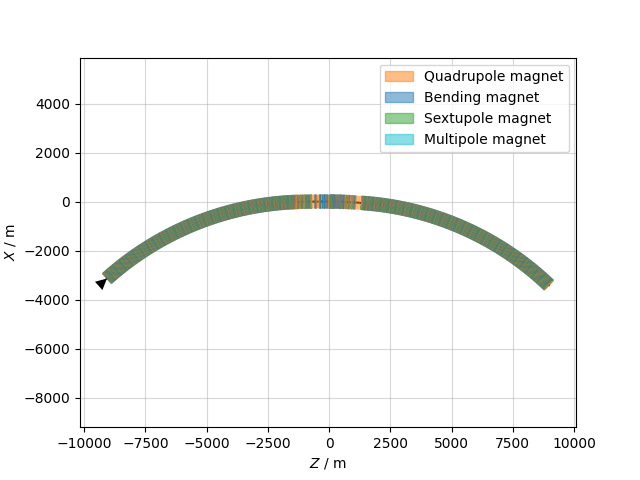

In [20]:
line.survey(element0='ip').plot()

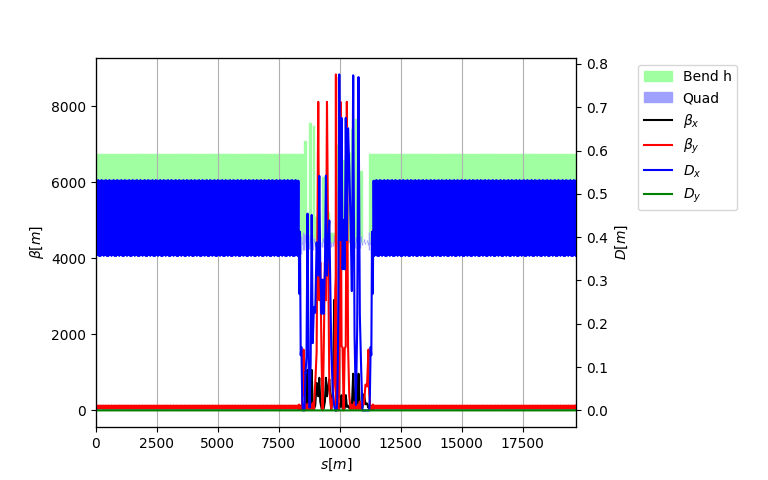

In [21]:
tw = line.twiss(init=tw_arc)
tw.plot()

In [22]:
tw.rows['ip.*'].cols['betx bety']

TwissTable: 8 rows, 3 cols
name                betx          bety
ipimag4::0       19.1396       16.2674
ipimag3::0       25.5246        13.907
ipimag2::0       63.6323       1.28212
ip::0            0.10001    0.00070001
ip::1            0.10001    0.00070001
ipimag2::1       42.8048       1.15192
ipimag3::1       60.0655       19.9017
ipimag4::1       34.7215       33.1884

In [19]:
line.get_table().rows['ip.*']

Table: 8 rows, 11 cols
name                   s element_type isthick isreplica parent_name iscollective       s_start ...
ipimag4::0        8763.2 Marker         False     False None               False        8763.2
ipimag3::0       8937.06 Marker         False     False None               False       8937.06
ipimag2::0       9296.33 Marker         False     False None               False       9296.33
ip::0            9846.06 Marker         False     False None               False       9846.06
ip::1            9846.06 Marker         False     False None               False       9846.06
ipimag2::1       10159.6 Marker         False     False None               False       10159.6
ipimag3::1       10443.3 Marker         False     False None               False       10443.3
ipimag4::1       10659.9 Marker         False     False None               False       10659.9